# Analysis of the Scraping Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_excel('../results/filtred_papers.xlsx')

In [7]:
df.head(2)

,Title,URL,Abstract,Source,Year,is_relevent,Verdict
0,Towards comprehensive testing on the robustnes...,https://openaccess.thecvf.com/content/CVPR2022...,NaN,Computer Vision Foundation (CVF),2022,0,The title and abstract provided do not mention...
1,Marnet: Backdoor attacks against cooperative m...,https://ieeexplore.ieee.org/abstract/document/...,Recent works have revealed that backdoor attac...,IEEE,2022,1,The abstract discusses adversarial attacks (ba...


In [8]:
# count number of missing values per column
df.isnull().sum() / len(df)

Title          0.000000
URL            0.000000
Abstract       0.135177
Source         0.001536
Year           0.000000
is_relevent    0.000000
Verdict        0.000000
dtype: float64

In [6]:
# merge source and venue columns into one (basically, they are duplicates)
df['Source'] = df['Source'].fillna(df['Venue'])
df = df.drop(columns=['Venue'])

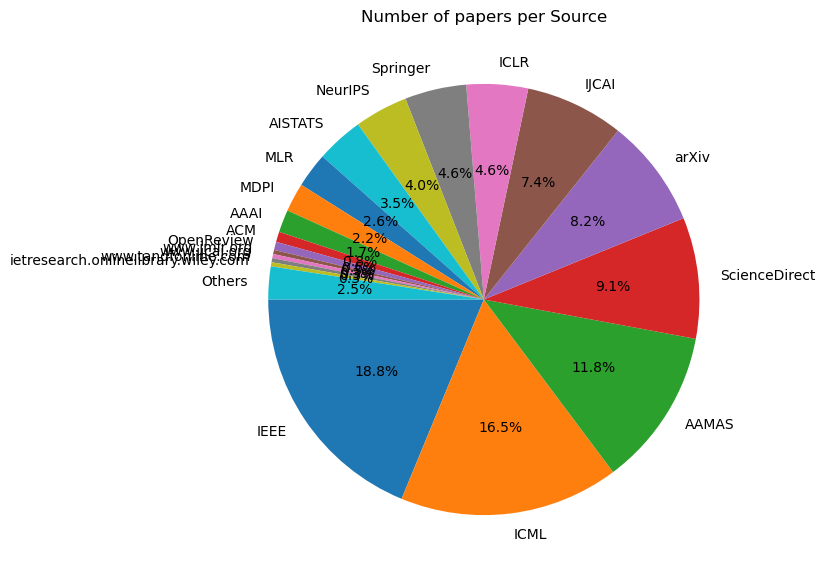

In [10]:
# pie chart of the number of papers per Source, show the sources with less than 2 papers as 'Others'
n_df = df['Source'].value_counts()
n_df['Others'] = sum(n_df[n_df < 2])
n_df = n_df[n_df >= 2]

plt.figure(figsize=(7, 7))
plt.pie(n_df, labels=n_df.index, autopct='%1.1f%%', startangle=180)
plt.title('Number of papers per Source')
plt.show()

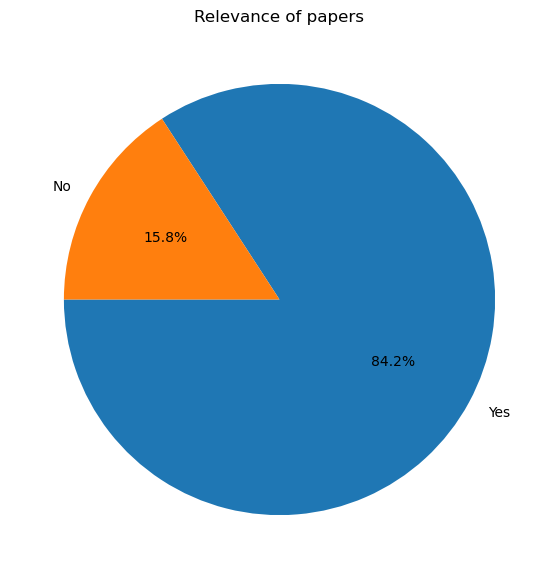

In [12]:
# plot pie chart of is_relevant
plt.figure(figsize=(7, 7))
plt.pie(df['is_relevent'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%', startangle=180)
plt.title('Relevance of papers')
plt.show()

In [13]:
# filter out irrelevant papers
df = df[df['is_relevent'] == 1]

In [16]:
# size of the dataset
len(df)

103

In [17]:
# save the filtered dataset
df.to_excel('../results/relevant_papers.xlsx', index=False)

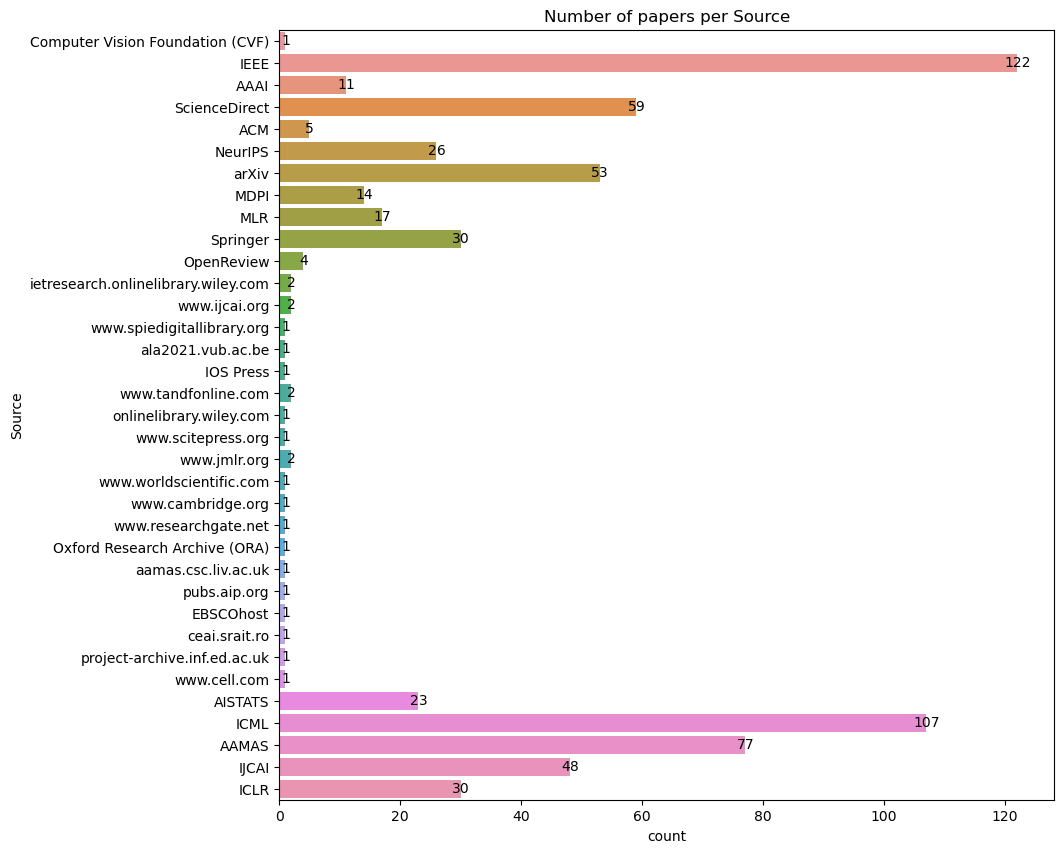

In [27]:
# barplot of the number of papers per Source
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='Source')
# add number of papers per Source on the right of each bar
for i in range(len(df['Source'].value_counts(sort=False).index)):
    plt.text(df['Source'].value_counts(sort=False).values[i]+0.05, i, df['Source'].value_counts(sort=False).values[i], ha='center', va='center')
plt.title('Number of papers per Source')
plt.show()

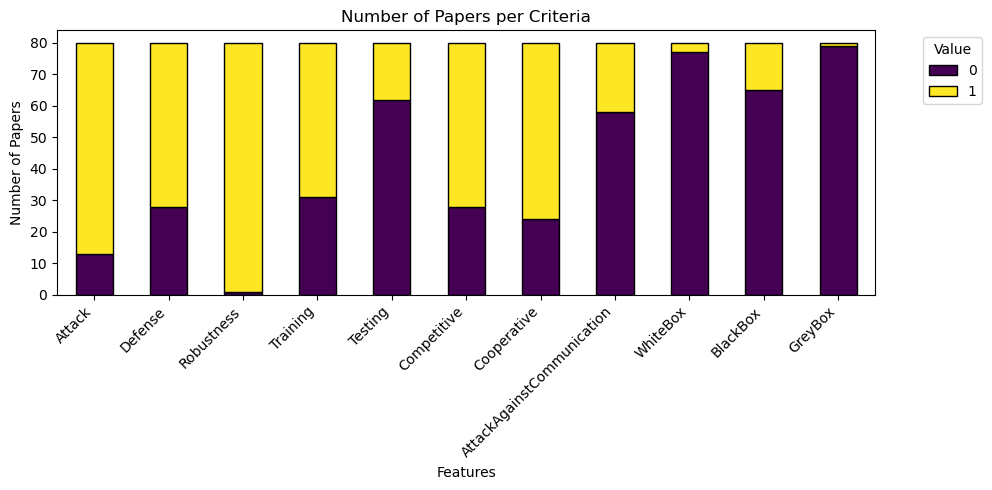

In [114]:
# Prepare data for stacked bar plot
features = [
    'Attack', 'Defense', 'Robustness', 'Training', 'Testing',
    'Competitive', 'Cooperative', 'AttackAgainstCommunication',
    'WhiteBox', 'BlackBox', 'GreyBox'
]

# Count the occurrences for each feature
counts = {feature: df[feature].value_counts() for feature in features}
count_df = pd.DataFrame(counts).fillna(0).astype(int)

# Create a stacked bar plot
count_df.T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 5), 
    colormap='viridis',
    edgecolor='black'
)

plt.title("Number of Papers per Criteria")
plt.ylabel("Number of Papers")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()